# Midterm Project

The dataset which was used is at https://www.kaggle.com/datasets/deepu1109/star-dataset?resource=download

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import bentoml

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import xgboost as xgb

In [2]:
data = pd.read_csv('./6_class_csv.csv')

### Star types

Brown Dwarf -> Star Type = 0

Red Dwarf -> Star Type = 1

White Dwarf-> Star Type = 2

Main Sequence -> Star Type = 3

Supergiant -> Star Type = 4

Hypergiant -> Star Type = 5


In [3]:
data.head()


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


For easier access to the colums we remove the units and convert ' ' to underscore

In [4]:
data.columns = data.columns.str.lower().str.replace(' ', '_')

units = ['_\(k\)', '\(l/lo\)', '\(r/ro\)', '\(mv\)']

for unit in units:
   data.columns = data.columns.str.lower().str.replace(unit, '')


/tmp/ipykernel_5296/290336095.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  data.columns = data.columns.str.lower().str.replace(unit, '')
/tmp/ipykernel_5296/290336095.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  data.columns = data.columns.str.lower().str.replace(unit, '')
/tmp/ipykernel_5296/290336095.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  data.columns = data.columns.str.lower().str.replace(unit, '')
/tmp/ipykernel_5296/290336095.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  data.columns = data.columns.str.lower().str.replace(unit, '')


In [5]:
data.columns

Index(['temperature', 'luminosity', 'radius', 'absolute_magnitude',
       'star_type', 'star_color', 'spectral_class'],
      dtype='object')

In [6]:
data.describe

<bound method NDFrame.describe of      temperature     luminosity     radius  absolute_magnitude  star_type  \
0           3068       0.002400     0.1700               16.12          0   
1           3042       0.000500     0.1542               16.60          0   
2           2600       0.000300     0.1020               18.70          0   
3           2800       0.000200     0.1600               16.65          0   
4           1939       0.000138     0.1030               20.06          0   
..           ...            ...        ...                 ...        ...   
235        38940  374830.000000  1356.0000               -9.93          5   
236        30839  834042.000000  1194.0000              -10.63          5   
237         8829  537493.000000  1423.0000              -10.73          5   
238         9235  404940.000000  1112.0000              -11.23          5   
239        37882  294903.000000  1783.0000               -7.80          5   

    star_color spectral_class  
0        

In [7]:
data.dtypes

temperature             int64
luminosity            float64
radius                float64
absolute_magnitude    float64
star_type               int64
star_color             object
spectral_class         object
dtype: object

In [8]:
data.notnull().count()

temperature           240
luminosity            240
radius                240
absolute_magnitude    240
star_type             240
star_color            240
spectral_class        240
dtype: int64

In [9]:
data.star_color.unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'Blue ',
       'yellowish', 'Yellowish', 'Orange-Red', 'Blue white ',
       'Blue-White'], dtype=object)

It looks like that we need to unify the different color spellings

In [10]:
replace_color = {
        'Blue ': 'blue',
        'Blue': 'blue',
        'Blue white': 'blue-white',
        'Blue white ': 'blue-white',
        'Blue-white': 'blue-white',
        'Blue White ': 'blue-white',
        'Blue White': 'blue-white',
        'Blue-White': 'blue-white',
        'yellow-white': 'yellow-white',
        'White-Yellow': 'yellow-white',
        'yellowish': 'yellowish',
        'Yellowish': 'yellowish',
        'Pale yellow orange': 'pale-yellow-orange',
        'Orange-Red': 'orange-red',
        'Red': 'red',
        'White': 'white',
        'Whitish': 'whitish',
        'Yellowish White': 'yellowish-white',
        'Orange': 'orange'
    }
data.star_color = data.star_color.replace(replace_color)

In [11]:
data.star_color.unique()

array(['red', 'blue-white', 'white', 'yellowish-white',
       'pale-yellow-orange', 'blue', 'whitish', 'yellow-white', 'orange',
       'yellowish', 'orange-red'], dtype=object)

<AxesSubplot: xlabel='star_type', ylabel='count'>

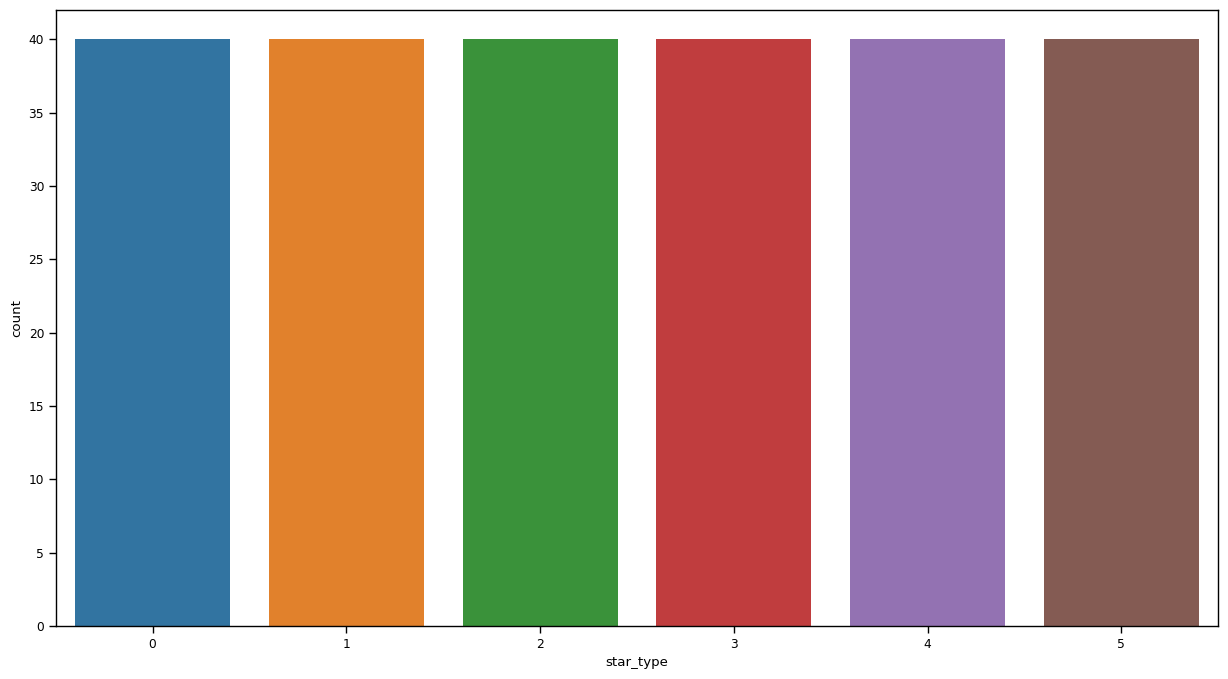

In [12]:
# make the visualitions for the better understanding of the classes
plt.rcParams['figure.figsize'] = (15,8)
sns.set_context("paper")

sns.countplot(x='star_type',data=data)

It seems that the dataset was already preprocessed and has balanced data.

array([[<AxesSubplot: xlabel='temperature', ylabel='temperature'>,
        <AxesSubplot: xlabel='luminosity', ylabel='temperature'>,
        <AxesSubplot: xlabel='radius', ylabel='temperature'>,
        <AxesSubplot: xlabel='absolute_magnitude', ylabel='temperature'>,
        <AxesSubplot: xlabel='star_type', ylabel='temperature'>],
       [<AxesSubplot: xlabel='temperature', ylabel='luminosity'>,
        <AxesSubplot: xlabel='luminosity', ylabel='luminosity'>,
        <AxesSubplot: xlabel='radius', ylabel='luminosity'>,
        <AxesSubplot: xlabel='absolute_magnitude', ylabel='luminosity'>,
        <AxesSubplot: xlabel='star_type', ylabel='luminosity'>],
       [<AxesSubplot: xlabel='temperature', ylabel='radius'>,
        <AxesSubplot: xlabel='luminosity', ylabel='radius'>,
        <AxesSubplot: xlabel='radius', ylabel='radius'>,
        <AxesSubplot: xlabel='absolute_magnitude', ylabel='radius'>,
        <AxesSubplot: xlabel='star_type', ylabel='radius'>],
       [<AxesSubplot: xla

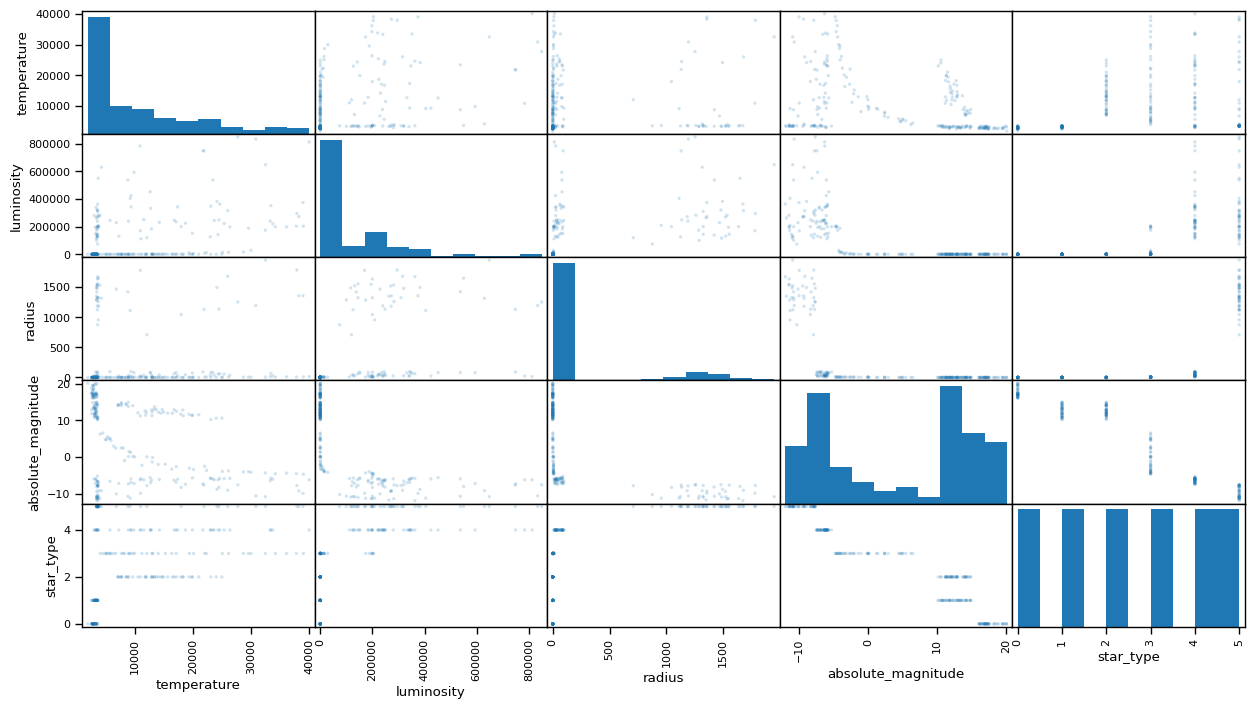

In [13]:
df = pd.DataFrame(data)

pd.plotting.scatter_matrix(df, alpha=0.2)

# Train the dataset

In [14]:
df_train, df_test = train_test_split(data, test_size=0.2, random_state=11)

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.star_type
y_test = df_test.star_type

del df_train['star_type']
del df_test['star_type']

In [15]:
y_train.unique()

array([3, 1, 0, 5, 2, 4])

In [16]:
dv = DictVectorizer(sparse=False)

train_dicts = df_train.fillna(0).to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

test_dicts = df_test.fillna(0).to_dict(orient='records')
X_test = dv.transform(test_dicts)

In [17]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=10,
                            min_samples_leaf=3,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [18]:
y_pred = rf.predict(X_test)

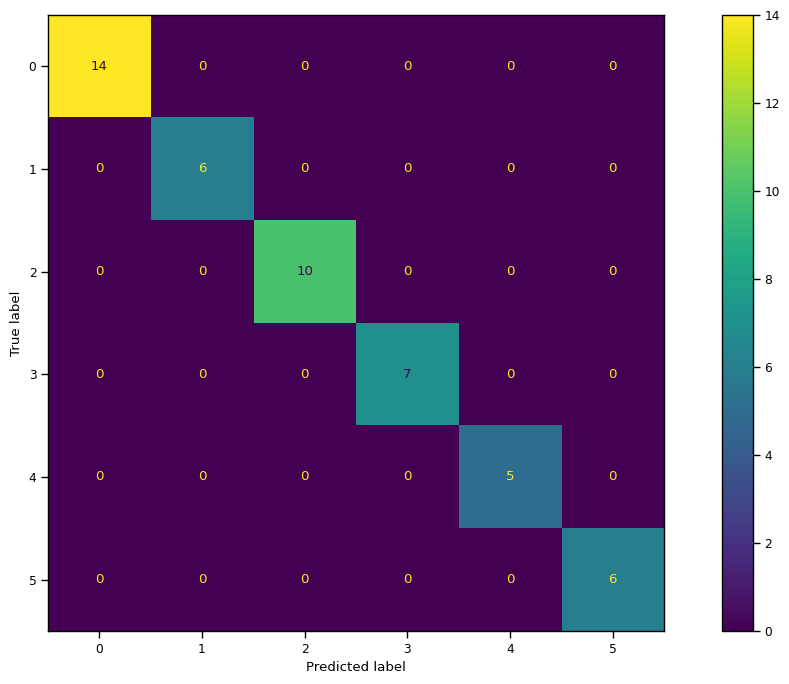

In [19]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()
plt.show()

# Export the random forrest classifier for BentoML

In [20]:
bentoml.sklearn.save_model(
    'star_type_model_skl',
    rf,
    custom_objects={
        'dictVectorizer': dv
    },
    signatures={ 
       'predict': {
           'batchable': True,
           'batch_dim': 0
           
       }}
)

Model(tag="star_type_model_skl:5ctuh3tapksrami2", path="/home/dietmar/bentoml/models/star_type_model_skl/5ctuh3tapksrami2/")

# Create model with XGBoost

For XGBoost we have to modify the y vector to map our values [0, 1, 2, 3, 4, 5] to values beween [0,1] because XGBoost expects that.

In [21]:
replace_values = { 0: 0.0, 1: 0.2, 2: 0.4, 3: 0.6, 4: 0.8, 5: 1.0}
y_train = y_train.replace(replace_values)

In [22]:
y_train.unique()

array([0.6, 0.2, 0. , 1. , 0.4, 0.8])

In [23]:
dtrain = xgb.DMatrix(X_train, label=y_train)

In [24]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

# Export the xgboost model using BentoML

In [25]:
bentoml.xgboost.save_model(
    'star_type_model',
    model,
    custom_objects={
        'dictVectorizer': dv
    },
    signatures={ 
       'predict': {
           'batchable': True,
           'batch_dim': 0
           
       }}
)

Model(tag="star_type_model:5ctuh4dapksrami2", path="/home/dietmar/bentoml/models/star_type_model/5ctuh4dapksrami2/")

In [26]:
import json

In [27]:
request = df_test.iloc[0].to_dict()
print(json.dumps(request, indent=2))

{
  "temperature": 5587,
  "luminosity": 0.819,
  "radius": 0.99,
  "absolute_magnitude": 5.03,
  "star_color": "yellow-white",
  "spectral_class": "F"
}
